#합성곱신경망 이진분류 (cats and dogs - 컬러이미지)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
import tensorflow as tf

#1.데이터 가져오기

In [2]:
# 구글 드라이브는 gdown으로 받음
# 해당 데이터셋은 이미지 크기가 다 다름
# 크기 다 맞춰주면 더 좋은 결과를 낼 수 있음
# !gdown https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR

Downloading...
From (original): https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR
From (redirected): https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR&confirm=t&uuid=77c9ace1-1aea-46cc-9e78-27b79e515e56
To: /content/cats_and_dogs.zip
100% 68.6M/68.6M [00:01<00:00, 35.9MB/s]


In [3]:
# !unzip -q 'cats_and_dogs.zip'

In [4]:
# 수동 로딩 방법
data_root = './cats_and_dogs'
train_dir = data_root + '/train'
test_dir = data_root + '/test'

###이미지 로딩

In [5]:
# 따로 함수를 사용하면 폴더 이름이 레이블 명이 됨
class_name = ['cat', 'dog']

In [8]:
# 해당 폴더 밑에 있는 모든 이미지의 이름 불러오기
import os
train_cats_fname = os.listdir(train_dir + '/cats')
train_dogs_fname = os.listdir(train_dir + '/dogs')

In [17]:
import PIL

X_train = []
y_train = []

# 해당 폴더에 있는 이미지를 읽어서 가져옴
for fname in train_cats_fname:
  Image = PIL.Image.open(train_dir + '/cats/' + fname)
  # 실습에서는 크기 고려해서 맞추지 않고 일반적인 사이즈인 224를 사용
  Image = Image.resize((224,224))
  arr = np.array(Image)
  X_train.append(arr)
  # 0이 애옹쓰
  # 1이 멍멍쓰
  y_train.append(0)

In [19]:
# 해당 폴더에 있는 이미지를 읽어서 가져옴
for fname in train_dogs_fname:
  Image = PIL.Image.open(train_dir + '/dogs/' + fname)
  # 실습에서는 크기 고려해서 맞추지 않고 일반적인 사이즈인 224를 사용
  Image = Image.resize((224,224))
  arr = np.array(Image)
  X_train.append(arr)
  # 0이 애옹쓰
  # 1이 멍멍쓰
  y_train.append(1)

In [20]:
len(X_train), len(y_train)

(2600, 2600)

In [21]:
X_train = np.array(X_train)
y_train = np.array(y_train)

###테스트 데이터 로딩

In [22]:
#하렴

#2.데이터 분리

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [24]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2080, 224, 224, 3), (520, 224, 224, 3), (2080,), (520,))

In [26]:
samples = np.random.randint(2000, size=25)
samples

array([ 681,  549,   82, 1303, 1631, 1911, 1552,  487,  314,  760,  503,
       1487,  929, 1565,  213, 1719, 1878,   12, 1331, 1039, 1969, 1121,
       1551, 1641, 1256])

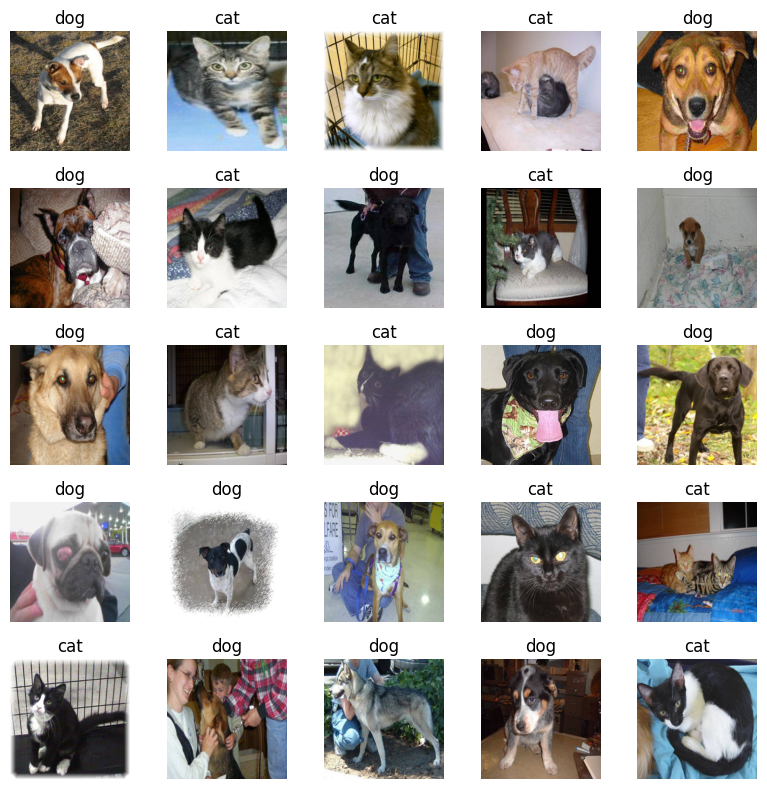

In [27]:
fig = plt.figure(figsize=(8,8))
for i, idx in enumerate(samples):
  # 한줄에 5개씩 5줄
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[idx], cmap="gray")
  plt.axis('off')
  plt.title(class_name[y_train[idx]])
plt.tight_layout()
plt.show()

###스케일링

In [28]:
# X_train_s = X_train.astype('float')/255.
# X_val_s = X_val.astype('float')/255.
# 결과는 똑같음
X_train_s = X_train/255.
X_val_s = X_val/255.

###인코딩

In [29]:
# 이진분류는 원핫인코딩 당연히 필요없음

##3.모델 만들기

In [30]:
X_train_s.shape

(2080, 224, 224, 3)

In [39]:
from keras import layers

model = keras.Sequential([
    layers.Input(shape=(224,224,3)),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=16, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=8, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(units=16, activation='relu'),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=1, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │          18,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,065 (176.04 KB)

 Trainable params: 45,065 (176.04 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [42]:
epochs = 10
batch_size = 32

history = model.fit(X_train_s, y_train,
                    epochs=epochs,
                    batch_size = batch_size,
                    validation_data=(X_val_s, y_val))

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - acc: 0.5088 - loss: 0.6928

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


65/65 ━━━━━━━━━━━━━━━━━━━━ 248s 4s/step - acc: 0.5086 - loss: 0.6928 - val_acc: 0.5115 - val_loss: 0.6931
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - acc: 0.5043 - loss: 0.6930 - val_acc: 0.5115 - val_loss: 0.6905
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - acc: 0.4936 - loss: 0.6899 - val_acc: 0.5115 - val_loss: 0.6807
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 259s 4s/step - acc: 0.4806 - loss: 0.6683 - val_acc: 0.5115 - val_loss: 0.6561
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 251s 4s/step - acc: 0.5074 - loss: 0.6087 - val_acc: 0.5115 - val_loss: 0.6596
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 258s 4s/step - acc: 0.4913 - loss: 0.5966 - val_acc: 0.5115 - val_loss: 0.6366
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - acc: 0.5020 - loss: 0.5452 - val_acc: 0.5115 - val_loss: 0.6242
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 246s 4s/step - acc: 0.4917 - loss: 0.4964 - val_acc: 0.5115 - val_loss: 0.6271
Epoch 9/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - acc: 0.5062 - loss: 0.

##4.테스트

In [ ]:
ㄱ